The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

Gravity Details

Acceleration of gravity at surface level:    9.7911 m/s²
Acceleration of gravity at   5.000 km (ASL): 9.7802 m/s²


Launch Site Details

Launch Date: 2025-07-02 12:00:00 UTC
Launch Site Latitude: 32.99025°
Launch Site Longitude: -106.97500°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315468.64 W    3651938.65 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1471.5 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 5.000 km
Forecast Time Period: from 2025-07-01 12:00:00 to 2025-07-17 12:00:00 utc
Forecast Hour Interval: 3 hrs
Forecast Latitude Range: From -90.0° to 90.0°
Forecast Longitude Range: From 0.0° to 359.75°

Surface Atmospheric Conditions

Surface Wind Speed: 1.47 m/s
Surface Wind Direction: 209.42°
Surface Wind Heading: 29.42°
Surface Pressure: 854.88 hPa
Surface Temperature: 291.63 K
Surface Air Density: 1.021 

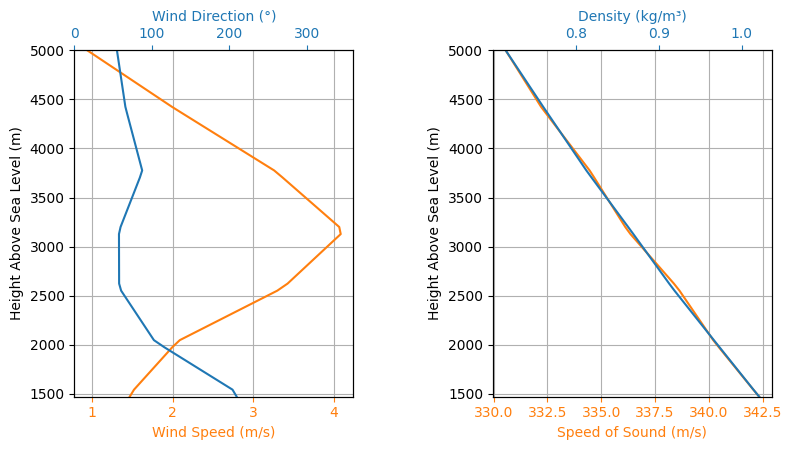

Nozzle Details
Nozzle Radius: 0.033 m
Nozzle Throat Radius: 0.011 m

Grain Details
Number of Grains: 5
Grain Spacing: 0.005 m
Grain Density: 1815 kg/m3
Grain Outer Radius: 0.033 m
Grain Inner Radius: 0.015 m
Grain Height: 0.12 m
Grain Volume: 0.000 m3
Grain Mass: 0.591 kg

Motor Details
Total Burning Time: 3.9 s
Total Propellant Mass: 2.956 kg
Structural Mass Ratio: 0.380
Average Propellant Exhaust Velocity: 2134.773 m/s
Average Thrust: 1618.000 N
Maximum Thrust: 1618.0 N at 0.0 s after ignition.
Total Impulse: 6310.200 Ns



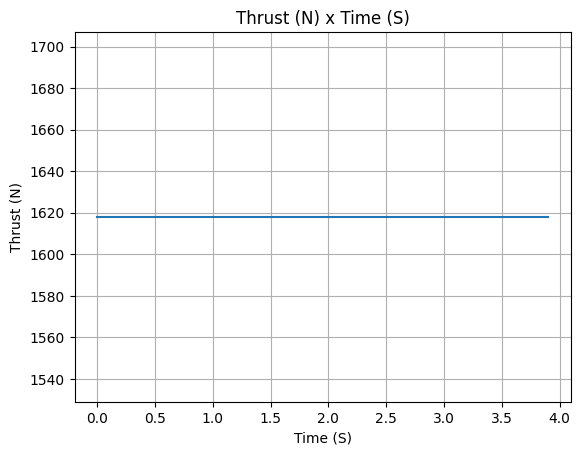

ValueError: Could not read the csv or txt file to create Function source.

In [ ]:
%load_ext autoreload
%autoreload 2

from rocketpy import Environment, Flight, Rocket, SolidMotor

%matplotlib inline
env = Environment(latitude=32.990254, longitude=-106.974998, elevation=1400)

import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
    (tomorrow.year, tomorrow.month, tomorrow.day, 12)
)  # Hour given in UTC time

env.set_atmospheric_model(type="Forecast", file="GFS")

env.max_expected_height = 5000  # adjust the plots to this height
env.info()


#  Rocket motor parameters
#  IMPORTANT: modify the file path below to match your own system

Pro75M1670 = SolidMotor(
    thrust_source=1618,
    dry_mass=1.815,
    dry_inertia=(0.125, 0.125, 0.002),
    nozzle_radius=33 / 1000,
    grain_number=5,
    grain_density=1815,
    grain_outer_radius=33 / 1000,
    grain_initial_inner_radius=15 / 1000,
    grain_initial_height=120 / 1000,
    grain_separation=5 / 1000,
    grains_center_of_mass_position=0.397,
    center_of_dry_mass_position=0.317,
    nozzle_position=0,
    burn_time=3.9,
    throat_radius=11 / 1000,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

Pro75M1670.info()

# Defininf parameters of rocket
calisto = Rocket(
    radius=127 / 2000,
    mass=14.426,
    inertia=(6.321, 6.321, 0.034),
    power_off_drag="../data/rockets/calisto/powerOffDragCurve.csv",
    power_on_drag="../data/rockets/calisto/powerOnDragCurve.csv",
    center_of_mass_without_motor=0,
    coordinate_system_orientation="tail_to_nose",
)

calisto.add_motor(Pro75M1670, position=-1.255)

rail_buttons = calisto.set_rail_buttons(
    upper_button_position=0.0818,
    lower_button_position=-0.6182,
    angular_position=45,
)

nose_cone = calisto.add_nose(
    length=0.55829, kind="von karman", position=1.278
)

fin_set = calisto.add_trapezoidal_fins(
    n=4,
    root_chord=0.120,
    tip_chord=0.060,
    span=0.110,
    position=-1.04956,
    cant_angle=0.5,
    airfoil=("../data/airfoils/NACA0012-radians.txt","radians"),
)

tail = calisto.add_tail(
    top_radius=0.0635, bottom_radius=0.0435, length=0.060, position=-1.194656
)

main = calisto.add_parachute(
    name="main",
    cd_s=10.0,
    trigger=800,      # ejection altitude in meters
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

drogue = calisto.add_parachute(
    name="drogue",
    cd_s=1.0,
    trigger="apogee",  # ejection at apogee
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

calisto.plots.static_margin()
calisto.draw()

# Parameters of testing flight  
test_flight = Flight(
    rocket=calisto, environment=env, rail_length=5.2, inclination=85, heading=0
    )
test_flight.info()
test_flight.prints.surface_wind_conditions()
test_flight.prints.launch_rail_conditions()
test_flight.prints.out_of_rail_conditions()
test_flight.prints.burn_out_conditions()
test_flight.prints.apogee_conditions()
test_flight.prints.events_registered()
test_flight.prints.impact_conditions()
test_flight.prints.maximum_values()
test_flight.plots.trajectory_3d()
test_flight.plots.linear_kinematics_data()
test_flight.plots.flight_path_angle_data()
test_flight.plots.attitude_data()
test_flight.plots.angular_kinematics_data()
test_flight.plots.aerodynamic_forces()
test_flight.plots.rail_buttons_forces()
test_flight.plots.energy_data()
test_flight.plots.fluid_mechanics_data()
test_flight.plots.stability_and_control_data()
